In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets
from torchvision import transforms
from matplotlib import pyplot as plt
import d2l

torch.set_printoptions(sci_mode=False)
data_path = './data-unversioned/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.ToTensor())

label_map = {0:0, 2:1}
class_name = {'airplane', 'bird'}
# cifar2 = [(img, label_map[label]) for img, label in cifar if label in [0, 2]]
# cifar2_val = [(img, label_map[label]) for img, label in cifar_val if label in [0, 2]]


In [ ]:
cifar2_unnormal = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val_unnormal = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]
img, _ = cifar2_unnormal[0]
print(img.shape)
imgs = torch.stack([img for img, _ in cifar2_unnormal], dim=3)
imgs_bychannel = imgs.view(3, -1)
imgs_mean = imgs_bychannel.mean(dim = 1)
imgs_std = imgs_bychannel.std(dim=1)
xform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=imgs_mean, std=imgs_std)
    ]
)
cifar2 = [(img, label_map[label]) for img, label in datasets.CIFAR10(data_path, train=True, download=False, transform=xform) if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in datasets.CIFAR10(data_path, train=False, download=False, transform=xform) if label in [0, 2]]

KeyboardInterrupt: 

In [2]:
xform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]
)
cifar2 = [(img, label_map[label]) for img, label in datasets.CIFAR10(data_path, train=True, download=False, transform=xform) if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in datasets.CIFAR10(data_path, train=False, download=False, transform=xform) if label in [0, 2]]

In [3]:
print(cifar2[0])

(tensor([[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
         [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
         [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
         ...,
         [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
         [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
         [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],

        [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
         [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
         [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
         ...,
         [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
         [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
         [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],

        [[-0.4487, -0.7935, -0.1939,  ..., -0.6136, -0.6736, -0.8535],
         [-0.4487, -0.9734, -1.0634,  ..., -

In [3]:
import random
def set_seed(seed: int = 123) -> None:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.mps.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed()


<class 'torch.nn.parameter.Parameter'>:torch.Size([16, 3, 3, 3]), <class 'torch.nn.parameter.Parameter'>:torch.Size([16])
tensor(0.2314)
torch.Size([1, 16, 32, 32])


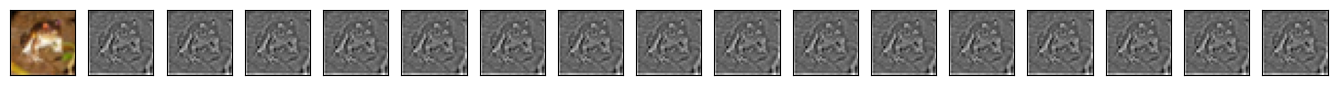

In [ ]:
set_seed()

conv = nn.Conv2d(3, 16, 3, padding=1)
print(f"{type(conv.weight)}:{conv.weight.shape}, {type(conv.bias)}:{conv.bias.shape}")

img, _ = cifar2[0]
img_batch = img.unsqueeze(0)

print(img[0][0][0])

with torch.no_grad():
    conv.bias.zero_()
    # conv.weight.fill_(1.0/9.0)
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    # conv.weight[:] = torch.tensor([[-1.0, -1.0, -1.0],
    #                                [0.0, 0.0, 0.0],
    #                                [1.0, 1.0, 1.0]])
    # conv.weight[:] = torch.tensor([[0.,-1.,0.],
    #                                [-1.,5.,-1.],
    #                                [0.,-1.,0.]])


output = conv(img_batch)
print(f"{output.shape}")

plt.figure(figsize=(17, 1))

plt.subplot(1, 17, 1)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.imshow(img.permute(1,2,0))

with torch.no_grad():
    for idx in range(1, 17):
        plt.subplot(1, 17, idx + 1)
        plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
        plt.imshow(output[0][idx-1], cmap='gray')

plt.show()

MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
torch.Size([3, 32, 32]), torch.Size([1, 3, 33, 33])


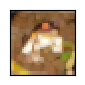

In [ ]:
pool = nn.MaxPool2d(2, stride=1, padding=1)
print(pool)
output = pool(img.unsqueeze(0))
print(f"{img.shape}, {output.shape}")

plt.figure(figsize=(17, 1))

plt.subplot(1, 17, 1)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False)
plt.imshow(output[0].permute(1,2,0))
plt.show()

In [ ]:
class NetOld(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(x)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetOld()
numel_list = [ p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = F.max_pool2d(F.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    


In [ ]:
import torch.nn.functional as F
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)

        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [4]:
import torch.nn.functional as F
import torch.nn as nn
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * self.n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out =  F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
        



In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)

        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
        
    

In [ ]:
class NetDropoutBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv1_dropout(out)
        
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_dropout(out)

        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [14]:
class NetDropoutBatchNormV2(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1, bias=False)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1, bias=False)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

        torch.nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.conv1_batchnorm.weight, 0.5)
        torch.nn.init.zeros_(self.conv1_batchnorm.bias)

        torch.nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.conv2_batchnorm.weight, 0.5)
        torch.nn.init.zeros_(self.conv2_batchnorm.bias)

        torch.nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        torch.nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='relu')

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.relu(out), 2)
        out = self.conv1_dropout(out)
        
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.relu(out), 2)
        out = self.conv2_dropout(out)

        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32) -> None:
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, self.n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(self.n_chans1, self.n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(self.n_chans1 // 2, self.n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * self.n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)

        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)

        return out


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class NetRes(nn.Module):
    def __init__(self, n_chans1=32) -> None:
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, self.n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(self.n_chans1, self.n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(self.n_chans1 // 2, self.n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * self.n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)

        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)

        return out

In [4]:
import torch.nn as nn
import torch.nn.functional as F
# class ResBlock(nn.Module):
#     def __init__(self, n_chans) -> None:
#         super(ResBlock, self).__init__()
#         self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
#         self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
#         nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
#         nn.init.constant_(self.batch_norm.weight, 0.5)
#         nn.init.zeros_(self.batch_norm.bias)

#     def forward(self, x):
#         out = self.conv(x)
#         out = self.batch_norm(out)
#         out = torch.relu(out)

#         return out + x

class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [5]:
import torch.nn as nn
import torch.nn.functional as F
# class NetResDeep(nn.Module):
#     def __init__(self, n_chans1=32, n_blocks=10) -> None:
#         super().__init__()
#         self.n_chans1 = n_chans1
#         self.n_blocks = n_blocks

#         self.conv1 = nn.Conv2d(3, self.n_chans1, kernel_size=3, padding=1)
#         self.resblocks = nn.Sequential(
#             *(self.n_blocks * [ResBlock(n_chans=self.n_chans1)])
#         )
#         self.fc1 = nn.Linear(8 * 8 * self.n_chans1, 32)
#         self.fc2 = nn.Linear(32, 2)

#     def forward(self, x):
#         out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
#         out = self.resblocks(out)
#         out = F.max_pool2d(out, 2)
#         out = out.view(-1, 8 * 8 * self.n_chans1)
#         out = torch.relu(self.fc1(out))
#         out = self.fc2(out)

#         return out

class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out


In [6]:
import datetime

device = torch.device('mps')

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

# def validate(model, train_loader, val_loader):
#     accuracy = {'train':0, 'val':0}
#     for name, loader in {('train', train_loader), ('val', val_loader)}:
#         for imgs, labels in loader:
#             correct = 0
#             total = 0
#             with torch.no_grad():
#                 outputs = model(imgs.to(device))
#                 total += outputs.shape[0]
#                 _, predicted = torch.max(outputs, dim=1)
#                 count = int((predicted == labels.to(device)).sum())
#                 accuracy[name] = count/total
#     return accuracy


In [90]:
def _freeze_norm_stats(net):
    try:
        for m in net.modules():
            if isinstance(m, nn.BatchNorm2d):
                # m.track_running_stats = False
                m.train()

    except ValueError:  
        print("error")
        return

In [7]:
from d2l import torch as t

# def evaluate_accuracy(net, data_iter):
#     # if isinstance(net, nn.Module):
#     net.eval()

#     metric = t.Accumulator(2)

#     with torch.no_grad():
#         for X, y in data_iter:
#             X = X.to(device)
#             y = y.to(device)
#             metric.add(t.accuracy(net(X), y), y.numel())

#     return metric[0] / metric[1]

def evaluate_accuracy(net, data_iter):
    # if isinstance(net, nn.Module):
    # for m in net.modules():
    #         if isinstance(m, nn.BatchNorm2d):
    #             # m.track_running_stats = False
    #             print(m.running_mean, m.running_var)
    # net.eval()
    # _freeze_norm_stats(net)
    
    # metric = t.Accumulator(2)
    correct = 0
    total = 0
    with torch.no_grad():
        net.eval()
        for imgs, labels in data_iter:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = net(imgs)
            _, predicted = torch.max(outputs, dim=1) # <1>
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
            
    net.train()
            # metric.add(t.accuracy(outputs, labels), labels.numel())
    # accuracyRate = correct / total
    # accuracyRate1 = metric[0] / metric[1]
    # if accuracyRate != accuracyRate1:
    #     print("error:{accuracyRate:.2f}, {accuracyRate1:.2f}")
    
    # print("........................")
    # for m in net.modules():
    #         if isinstance(m, nn.BatchNorm2d):
    #             # m.track_running_stats = False
    #             print(m.running_mean, m.running_var)

    return correct / total

In [ ]:


def training_loop_original_version(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    set_seed()    
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs.to(device))
            loss = loss_fn(outputs, labels.to(device))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            # model.eval()                     
            # accuracy = validate(model, train_loader, val_loader)
            # print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{loss_train/len(train_loader)}, Train accuracy:{accuracy['train']:.2f}, Val accuracy:{accuracy['val']:.2f}")
            # model.train()
            print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{loss_train/len(train_loader)}")            


In [8]:
from d2l import torch as t

def train_epoch_d2l(net, train_iter, loss, updater, l2_lambda=0.0):
    # if isinstance(net, torch.nn.Module):
    net.train()
    
    metric = t.Accumulator(3)
    for X, y in train_iter:
        X = X.to(device)
        y = y.to(device)
        y_hat = net(X)
        l = loss(y_hat, y)

        if l2_lambda > 0.0:
            l2_norm = sum(p.pow(2.0).sum()
                          for p in net.parameters())
            l = l + l2_lambda * l2_norm

        updater.zero_grad()
        l.backward()
        updater.step()

        metric.add(float(l.item()), t.accuracy(y_hat, y.to(device)), y.numel())

    # Return training loss and training accuracy
    return metric[0] / len(train_iter), metric[1] / metric[2]


In [9]:
from d2l import torch as t
import datetime

def training_loop_d2l_with_validate(net, train_iter, test_iter, loss, num_epochs, updater, l2_lambda=0.0, show=True):
    if show:
      animator = t.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.1, 1.0],
                        legend=['train loss', 'train acc', 'test acc'])

    set_seed()    
    for epoch in range(1, num_epochs + 1):
      train_metrics = train_epoch_d2l(net, train_iter, loss, updater, l2_lambda=l2_lambda)
      test_acc = evaluate_accuracy(net, test_iter)
      if show:
        animator.add(epoch, train_metrics + (test_acc, ), show=show)

      if epoch == num_epochs or (show == False and (epoch == 1 or epoch % 10 == 0)):    
            print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{train_metrics[0]}, Train accuracy:{train_metrics[1]:.2f}, Val accuracy:{test_acc:.2f}")        

In [10]:
from d2l import torch as t
import datetime

def training_loop_d2l(net, train_iter, test_iter, loss, num_epochs, updater, l2_lambda=0.0, show=True):
    if show:
      animator = t.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.1, 1.0],
                        legend=['train loss', 'train acc'])

    set_seed()    
    for epoch in range(1, num_epochs + 1):
      train_metrics = train_epoch_d2l(net, train_iter, loss, updater, l2_lambda=l2_lambda)
    #   test_acc = evaluate_accuracy(net, test_iter)
      if show:
        animator.add(epoch, train_metrics, show=show)

      if epoch == num_epochs or (show == False and (epoch == 1 or epoch % 10 == 0)):    
            print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{train_metrics[0]}, Train accuracy:{train_metrics[1]:.2f}")        

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    set_seed()    
    for epoch in range(1, n_epochs + 1):
        train_metrics = train_epoch_d2l(model, train_loader, loss_fn, optimizer)
        if epoch == 1 or epoch % 10 == 0:
            # model.eval()                     
            # accuracy = validate(model, train_loader, val_loader)
            # print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{loss_train/len(train_loader)}, Train accuracy:{accuracy['train']:.2f}, Val accuracy:{accuracy['val']:.2f}")
            # model.train()
            print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{train_metrics[0]}, Train accuracy:{train_metrics[1]:.2f}")                   


In [ ]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs.to(device))
            loss = loss_fn(outputs, labels.to(device))

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2).sum() for p in model.parameters())
            loss =loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch == 1 or epoch % 10 == 0:
            accuracy = validate(model, train_loader, val_loader)
            print(f"{datetime.datetime.now()} Epoch {epoch}, loss:{loss_train/len(train_loader)}, Train accuracy:{accuracy['train']:.2f}, Val accuracy:{accuracy['val']:.2f}")



In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)


In [ ]:

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device = 'mps'
model = Net().to(device)
learning_rate = 1e-2
# l2_lambda = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate) #, weight_decay=l2_lambda * 2)
loss_fn = nn.CrossEntropyLoss()

training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)

2023-08-24 11:04:39.260879 Epoch 1, loss:0.5931959750166365
2023-08-24 11:04:47.580050 Epoch 10, loss:0.33002950317540747


2023-08-24 11:32:20.998098 Epoch 100, loss:0.14923909745493513, Train accuracy:0.94, Val accuracy:0.89


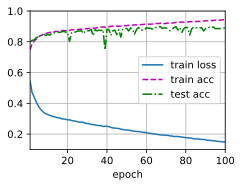

In [ ]:

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device = 'mps'
model = Net().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

2023-08-24 12:06:45.728920 Epoch 100, loss:0.08845439083447122, Train accuracy:0.97, Val accuracy:0.89


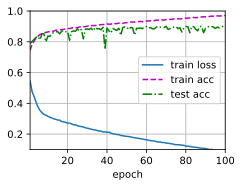

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device = 'mps'
model = NetWidth(n_chans1=32).to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

2023-08-24 12:13:44.748829 Epoch 100, loss:0.1612307688423023, Train accuracy:0.96, Val accuracy:0.89


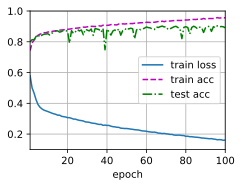

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'
model = NetWidth(n_chans1=32).to(device)
learning_rate = 1e-2
l2_lambda = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer, l2_lambda)

2023-08-24 12:18:37.860804 Epoch 100, loss:0.11635503016269891, Train accuracy:0.96, Val accuracy:0.89


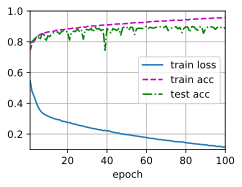

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'
model = NetWidth(n_chans1=32).to(device)
learning_rate = 1e-2
l2_lambda = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_lambda * 2.0)
loss_fn = nn.CrossEntropyLoss()

training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

2023-08-24 13:49:11.554324 Epoch 300, loss:0.11666000724598101, Train accuracy:0.96, Val accuracy:0.91


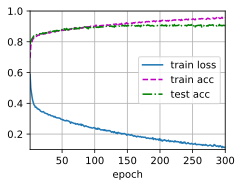

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetDropout().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 300, optimizer)

2023-08-24 12:45:06.850003 Epoch 100, loss:0.026067149629638454, Train accuracy:0.99, Val accuracy:0.87


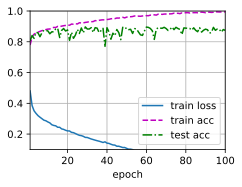

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetBatchNorm().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

2023-08-24 14:16:51.463907 Epoch 100, loss:0.07501775156825212, Train accuracy:0.97, Val accuracy:0.90


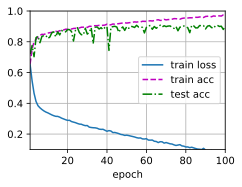

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetRes().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

2023-08-24 12:59:02.774142 Epoch 300, loss:0.10927425702191462, Train accuracy:0.96, Val accuracy:0.90


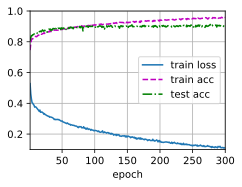

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetDropoutBatchNorm().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 300, optimizer)

2023-08-24 14:39:57.744699 Epoch 300, loss:0.15423308156288354, Train accuracy:0.94, Val accuracy:0.91


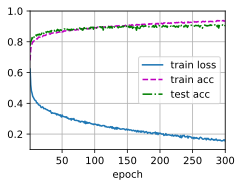

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetDropoutBatchNormV2().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 300, optimizer)

2023-08-29 21:53:02.582009 Epoch 300, loss:0.16354646378902682, Train accuracy:0.93


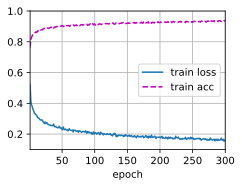

In [15]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetDropoutBatchNormV2().to(device)
learning_rate = 1e-2
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 300, optimizer)

In [16]:
model.eval()
# _freeze_norm_stats(model)
validate(model, 
         torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False),
         torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False))

Accuracy train: 0.98
Accuracy val: 0.90


{'train': 0.9791, 'val': 0.898}

2023-08-25 22:20:12.762623 Epoch 100, loss:0.001474227936979002, Train accuracy:1.00
Accuracy train: 0.80
Accuracy val: 0.77


{'train': 0.8021, 'val': 0.772}

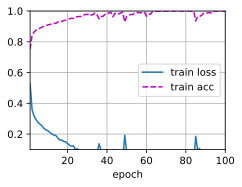

In [81]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetResDeep(n_chans1=32, n_blocks=10).to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

model.eval()
# _freeze_norm_stats(model)
validate(model, 
         torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False),
         torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False))

2023-08-27 22:34:02.985726 Epoch 100, loss:0.0016709373690889388, Train accuracy:1.00, Val accuracy:0.75
Accuracy train: 0.77
Accuracy val: 0.75


{'train': 0.7695, 'val': 0.7545}

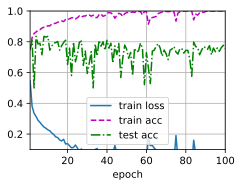

In [16]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetResDeep(n_chans1=32, n_blocks=10).to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l_with_validate(model, train_loader, val_loader, loss_fn, 100, optimizer, show=True)

model.eval()
# _freeze_norm_stats(model)
validate(model, 
         torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False),
         torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False))

2023-08-29 10:26:57.786825 Epoch 100, loss:0.03907799626148905, Train accuracy:0.98


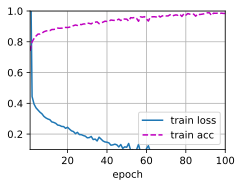

In [12]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetResDeep(n_chans1=32, n_blocks=100).to(device)
learning_rate = 3e-3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)


In [13]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes_NetResDeep_SGD.pt')

In [25]:
model1 = NetResDeep(n_chans1=32, n_blocks=100)
state_dict = torch.load(data_path + 'birds_vs_airplanes_NetResDeep_SGD.pt')
model1.load_state_dict(state_dict)
model1 = model1.to(device)

model1.eval()
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

validate(model1, train_loader, val_loader)

Accuracy train: 0.50
Accuracy val: 0.50


{'train': 0.5, 'val': 0.5}

2023-08-29 11:33:13.592206 Epoch 100, loss:0.2585250928903082, Train accuracy:0.90


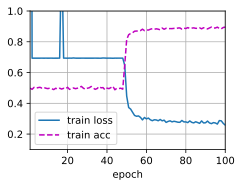

In [19]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetResDeep(n_chans1=32, n_blocks=100).to(device)
learning_rate = 1e-2
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.002)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

torch.save(model.state_dict(), data_path + 'birds_vs_airplanes_NetResDeep_Adam.pt')


In [20]:
model1 = NetResDeep(n_chans1=32, n_blocks=100)
state_dict = torch.load(data_path + 'birds_vs_airplanes_NetResDeep_Adam.pt')
model1.load_state_dict(state_dict)
model1 = model1.to(device)

model1.eval()
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

validate(model1, train_loader, val_loader)

Accuracy train: 0.90
Accuracy val: 0.88


{'train': 0.9035, 'val': 0.8845}

2023-08-29 21:41:35.232471 Epoch 100, loss:0.29878342456330126, Train accuracy:0.88


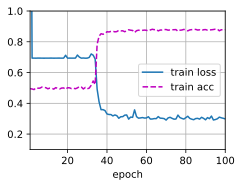

In [11]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=32, shuffle=True)

device='mps'

model = NetResDeep(n_chans1=32, n_blocks=100).to(device)
learning_rate = 1e-2
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.002)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

torch.save(model.state_dict(), data_path + 'birds_vs_airplanes_32batch_100Epochs_NetResDeep_Adam.pt')


In [12]:
model1 = NetResDeep(n_chans1=32, n_blocks=100)
state_dict = torch.load(data_path + 'birds_vs_airplanes_32batch_100Epochs_NetResDeep_Adam.pt')
model1.load_state_dict(state_dict)
model1 = model1.to(device)

model1.eval()
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

validate(model1, train_loader, val_loader)

Accuracy train: 0.89
Accuracy val: 0.88


{'train': 0.8899, 'val': 0.8765}

2023-08-29 11:59:13.789494 Epoch 100, loss:0.6934619834468623, Train accuracy:0.49


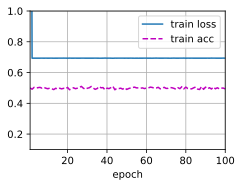

In [21]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = NetResDeep(n_chans1=32, n_blocks=100).to(device)
learning_rate = 1e-2
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer)

torch.save(model.state_dict(), data_path + 'birds_vs_airplanes_NetResDeep_Adam_NoDecay.pt')


In [22]:
model1 = NetResDeep(n_chans1=32, n_blocks=100)
state_dict = torch.load(data_path + 'birds_vs_airplanes_NetResDeep_Adam_NoDecay.pt')
model1.load_state_dict(state_dict)
model1 = model1.to(device)

model1.eval()
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

validate(model1, train_loader, val_loader)

Accuracy train: 0.50
Accuracy val: 0.50


{'train': 0.5, 'val': 0.5}

KeyboardInterrupt: 

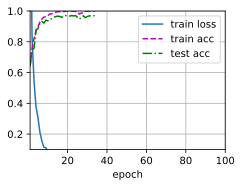

In [12]:
import torchvision

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

device='mps'
model = torchvision.models.resnet50().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
training_loop_d2l_with_validate(model, train_loader, val_loader, loss_fn, 100, optimizer)

In [18]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = torchvision.models.resnet152().to(device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer, show=False)

torch.save(model.state_dict(), data_path + 'birds_vs_airplanes_resnet152.pt')

model.eval()
# _freeze_norm_stats(model)
validate(model, 
         torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False),
         torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False))

2023-08-28 14:30:54.380016 Epoch 1, loss:1.3905169927770165, Train accuracy:0.65
2023-08-28 14:36:04.095516 Epoch 10, loss:0.2596278934009895, Train accuracy:0.91
2023-08-28 15:15:07.212387 Epoch 20, loss:0.10299369467979973, Train accuracy:0.96
2023-08-28 16:31:02.709805 Epoch 30, loss:0.058460357612307376, Train accuracy:0.98
2023-08-28 16:59:22.740236 Epoch 40, loss:0.054004254197007766, Train accuracy:0.98
2023-08-28 17:05:07.000824 Epoch 50, loss:0.03445815357192757, Train accuracy:0.99
2023-08-28 18:33:50.864373 Epoch 60, loss:0.02981459836169312, Train accuracy:0.99
2023-08-28 20:31:15.724666 Epoch 70, loss:0.015706364294902606, Train accuracy:1.00
2023-08-28 21:40:43.377156 Epoch 80, loss:0.014977381086039245, Train accuracy:1.00
2023-08-28 21:46:28.052655 Epoch 90, loss:0.018645481377206802, Train accuracy:0.99
2023-08-28 21:52:13.803794 Epoch 100, loss:0.008674934148550431, Train accuracy:1.00
Accuracy train: 1.00
Accuracy val: 0.86


{'train': 0.9996, 'val': 0.856}

In [ ]:
model1 = Net()
state_dict = torch.load(data_path + 'birds_vs_airplanes.pt')
model.load_state_dict(state_dict)


In [ ]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [20]:
state_dict = torch.load(data_path + 'birds_vs_airplanes_resnet152.pt')
model1 = torchvision.models.resnet152(pretrained=False)
model1.load_state_dict(state_dict)
model1 = model1.to(device)
model1.eval()
# _freeze_norm_stats(model)
validate(model1, 
         torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False),
         torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False))

/Users/alex/python_venv/sd/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/alex/python_venv/sd/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Accuracy train: 1.00
Accuracy val: 0.86


{'train': 0.9996, 'val': 0.856}

In [27]:
import torchvision

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

device='mps'

model = torchvision.models.resnet50().to(device)
learning_rate = 1e-2
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.002)
loss_fn = nn.CrossEntropyLoss()
# training_loop(100, optimizer, model, loss_fn, train_loader, val_loader)
training_loop_d2l(model, train_loader, val_loader, loss_fn, 100, optimizer, show=False)

torch.save(model.state_dict(), data_path + 'birds_vs_airplanes_resnet50Adam.pt')


2023-08-29 12:18:33.413360 Epoch 1, loss:0.8677321478819392, Train accuracy:0.72
2023-08-29 12:21:36.052971 Epoch 10, loss:0.3484061104097184, Train accuracy:0.86
2023-08-29 12:24:59.385017 Epoch 20, loss:0.30993640403838674, Train accuracy:0.87
2023-08-29 12:28:23.397483 Epoch 30, loss:0.30452220326965784, Train accuracy:0.87
2023-08-29 12:31:46.960380 Epoch 40, loss:0.3150551680736481, Train accuracy:0.87
2023-08-29 12:35:10.700681 Epoch 50, loss:0.31570687804632125, Train accuracy:0.87
2023-08-29 12:38:34.333489 Epoch 60, loss:0.2922295398393254, Train accuracy:0.88
2023-08-29 12:41:57.783796 Epoch 70, loss:0.28755284722443597, Train accuracy:0.88
2023-08-29 12:45:21.591926 Epoch 80, loss:0.3084722456468898, Train accuracy:0.87
2023-08-29 12:48:44.597635 Epoch 90, loss:0.2934113864306432, Train accuracy:0.88
2023-08-29 12:52:08.077460 Epoch 100, loss:0.2927914764850762, Train accuracy:0.88


In [29]:
state_dict = torch.load(data_path + 'birds_vs_airplanes_resnet50Adam.pt')
model1 = torchvision.models.resnet50(pretrained=False)
model1.load_state_dict(state_dict)
model1 = model1.to(device)
model1.eval()
# _freeze_norm_stats(model)
validate(model1, 
         torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False),
         torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False))

Accuracy train: 0.89
Accuracy val: 0.87


{'train': 0.8866, 'val': 0.87}